In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

%matplotlib inline
rcParams['figure.figsize'] = 8, 4
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("Poke_log.csv")
print(df.columns)

Index(['Tier', 'My Team/Pokemon Revealed', 'Opponent's Team/Pokemon Revealed',
       'Win/Loss', 'Own Pokemon Down', 'Opponent Pokemon Down',
       'My Moves Used', 'Opponent's Moves Used', 'Super effective',
       'Not very effective', 'My Attacking Moves', 'My Status Moves',
       'Opponent's Attacking Moves', 'Opponent's Status Moves', 'Turns',
       'Rank', 'Rank Range'],
      dtype='object')


In [3]:
df.head()

,Tier,My Team/Pokemon Revealed,Opponent's Team/Pokemon Revealed,Win/Loss,Own Pokemon Down,Opponent Pokemon Down,My Moves Used,Opponent's Moves Used,Super effective,Not very effective,My Attacking Moves,My Status Moves,Opponent's Attacking Moves,Opponent's Status Moves,Turns,Rank,Rank Range
0,[Gen 7] RU,Araquanid|Cloyster|Donphan|Jolteon|Pangoro|Sal...,Araquanid|Blastoise|Honchkrow|Metagross|Nidoqu...,Win,3,5,Fire Blast|Hydro Pump|Icicle Spear|Icicle Spea...,Aura Sphere|Brave Bird|Curse|Dark Pulse|Dark P...,3,5,13,4,13,3,25,NaN,NaN
1,[Gen 7] PU,Absol|Claydol|Gurdurr|Lopunny|Masquerain|Silvally,Absol|Carracosta|Combusken|Froslass|Lycanroc|O...,Win,5,6,Earth Power|Knock Off|Last Resort|Mach Punch|R...,Aqua Jet|Aqua Jet|Endeavor|Endeavor|Flare Blit...,5,7,14,3,15,4,22,1336 → 1358(+22 for winning),[1300-1400]
2,[Gen 7] Unrated Random Battle,Alakazam|Alakazam-Mega|Chansey|Hitmonchan|Magc...,Beautifly|Bisharp|Conkeldurr|Darmanitan|Kingle...,Win,2,6,Drain Punch|Drain Punch|Earth Power|Ice Punch|...,Dragon Pulse|Drain Punch|Flare Blitz|Psychic|P...,6,2,10,2,8,1,16,NaN,NaN
3,[Gen 7] Unrated Random Battle,Heracross|Lycanroc,Arbok|Azelf|Hoopa|Pangoro,Win,0,2,Accelerock|Earthquake|Earthquake|Fire Fang|Swo...,Nasty Plot|Superpower,0,1,4,1,1,1,6,NaN,NaN
4,[Gen 7] Unrated Random Battle,Breloom|Kyogre|Miltank|Wormadam-Trash|Yanmega,Azelf|Kangaskhan|Lycanroc-Dusk|Pyroar|Relicant...,Win,2,6,Air Slash|Ancient Power|Body Slam|Bullet Seed|...,Fire Blast|Fire Blast|Nasty Plot|Psyshock|Scal...,9,0,10,2,4,3,16,NaN,NaN


In [4]:
#sns.pairplot(df)

In [40]:
# Number of each games played in each tier
df.groupby(["Tier"]).count()["Win/Loss"]

Tier
[Gen 7] NU                        25
[Gen 7] PU                        31
[Gen 7] RU                        37
[Gen 7] Random Battle             85
[Gen 7] UU                        23
[Gen 7] Unrated Random Battle    229
Name: Win/Loss, dtype: int64

In [5]:
#Stats separated by tiers and win/loss
turns = df.groupby(["Tier", "Win/Loss"]).mean()["Turns"]
print(turns)

Tier                           Win/Loss
[Gen 7] NU                     Loss        23.000000
                               Win         19.130435
[Gen 7] PU                     Loss        23.166667
                               Win         17.880000
[Gen 7] RU                     Loss        27.000000
                               Win         19.031250
[Gen 7] Random Battle          Loss        19.600000
                               Win         18.813333
[Gen 7] UU                     Loss        30.000000
                               Win         17.500000
[Gen 7] Unrated Random Battle  Loss        22.678571
                               Win         20.318408
Name: Turns, dtype: float64


Text(0, 0.5, 'Turns')

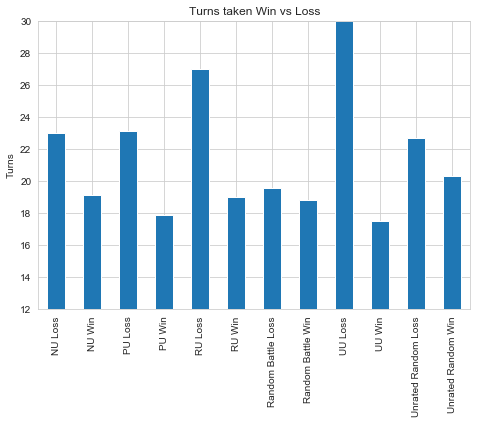

In [6]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])
turns.plot(kind='bar')

ax.set_title('Turns taken Win vs Loss')
ax.set_xticks(range(len(turns)))
ax.set_ylim([12,30])
ax.set_xticklabels(["NU Loss", "NU Win", "PU Loss", "PU Win", "RU Loss", "RU Win",
                   "Random Battle Loss", "Random Battle Win", "UU Loss", "UU Win",
                   "Unrated Random Loss", "Unrated Random Win"])
ax.set_xlabel('')
ax.set_ylabel('Turns')

In [41]:
#Grabs pokemon used by opponent by tier
#Start with NU
NUtier = df.loc[df["Tier"]=="[Gen 7] NU"]["Opponent's Team/Pokemon Revealed"]
opteamlist = []
for team in NUtier:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}
total_dict = {"NU":opteamdict}
#Gives a total count of each pokemon that's been used so far
NUdf = pd.DataFrame(total_dict, dtype=int)
print(NUdf["NU"].sort_values(ascending=False)[:10])

Xatu          8
Comfey        8
Incineroar    7
Slowking      6
Heliolisk     5
Togedemaru    5
Cinccino      5
Mismagius     5
Seismitoad    4
Steelix       4
Name: NU, dtype: int64


In [8]:
# RU most common pokemon to fight 
RUtier = df.loc[df["Tier"]=="[Gen 7] RU"]["Opponent's Team/Pokemon Revealed"]
opteamlist = []
for team in RUtier:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}
total_dict = {"RU":opteamdict}
RUdf = pd.DataFrame(total_dict, dtype=int)
print(RUdf["RU"].sort_values(ascending=False)[:10])

Metagross    11
Blastoise    10
Araquanid    10
Arcanine      7
Nidoqueen     7
Golisopod     6
Salazzle      6
Honchkrow     6
Sceptile      5
Gardevoir     5
Name: RU, dtype: int64


In [42]:
# PU Tier
PUtier = df.loc[df["Tier"]=="[Gen 7] PU"]["Opponent's Team/Pokemon Revealed"]
opteamlist = []
for team in PUtier:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}
total_dict = {"PU":opteamdict}
PUdf = pd.DataFrame(total_dict, dtype=int)
print(PUdf["PU"].sort_values(ascending=False)[:10])

Mesprit       6
Omastar       5
Silvally-*    5
Lycanroc      5
Skuntank      4
Guzzlord      4
Gurdurr       4
Hitmonchan    4
Manectric     4
Froslass      3
Name: PU, dtype: int64


In [10]:
# UU Tier
UUtier = df.loc[df["Tier"]=="[Gen 7] UU"]["Opponent's Team/Pokemon Revealed"]
opteamlist = []
for team in UUtier:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}
total_dict = {"UU":opteamdict}
UUdf = pd.DataFrame(total_dict, dtype=int)
print(UUdf["UU"].sort_values(ascending=False)[:10])

Scizor        7
Infernape     5
Krookodile    5
Amoonguss     5
Hydreigon     5
Blissey       4
Togekiss      4
Manectric     4
Rotom-Heat    4
Chesnaught    3
Name: UU, dtype: int64


In [11]:
# RB most common pokemon to fight 
RBtier = df.loc[df["Tier"]=="[Gen 7] Random Battle"]["Opponent's Team/Pokemon Revealed"]
opteamlist = []
for team in RBtier:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}
total_dict = {"RB":opteamdict}
RBdf = pd.DataFrame(total_dict, dtype=int)
print(RBdf["RB"].sort_values(ascending=False)[:20])

Darmanitan    5
Swellow       4
Dialga        4
Solgaleo      4
Mantine       4
Xurkitree     4
Buzzwole      4
Staraptor     4
Hitmontop     4
Azumarill     4
Sharpedo      4
Barbaracle    4
Volcarona     4
Lycanroc      3
Tauros        3
Feraligatr    3
Gallade       3
Sceptile      3
Flygon        3
Swampert      3
Name: RB, dtype: int64


In [12]:
# URB most common pokemon to fight 
URBtier = df.loc[df["Tier"]=="[Gen 7] Unrated Random Battle"]["Opponent's Team/Pokemon Revealed"]
opteamlist = []
for team in URBtier:
    pokes = team.split("|")
    for poke in pokes:
        opteamlist.append(poke)

opteamdict={x:opteamlist.count(x) for x in opteamlist}
total_dict = {"URB":opteamdict}
URBdf = pd.DataFrame(total_dict, dtype=int)
print(URBdf["URB"].sort_values(ascending=False)[:20])

Kingler       11
Dodrio         9
Zekrom         9
Ribombee       9
Bewear         9
Terrakion      9
Darmanitan     8
Rayquaza       8
Blissey        8
Weavile        7
Solgaleo       7
Slurpuff       7
Pangoro        7
Moltres        7
Charizard      7
Tauros         7
Yanmega        7
Aegislash      7
Diggersby      7
Heracross      7
Name: URB, dtype: int64


In [13]:
moves = df.groupby(["Win/Loss"]).mean()[["My Attacking Moves", "My Status Moves",
                                         "Opponent's Attacking Moves", "Opponent's Status Moves"]]
print(moves)

          My Attacking Moves  My Status Moves  Opponent's Attacking Moves  \
Win/Loss                                                                    
Loss               12.333333         3.851852                   13.018519   
Win                11.239362         3.545213                    9.813830   

          Opponent's Status Moves  
Win/Loss                           
Loss                     4.037037  
Win                      3.577128  


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ab78240>,
      dtype=object)

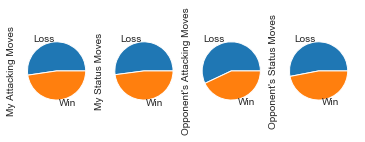

In [14]:
moves.plot(kind='pie', subplots=True, legend=False)

In [15]:
# Most used moves in RU
RUmoves = df.loc[df["Tier"]=="[Gen 7] RU"]["Opponent's Moves Used"]
opmovelist = []
for movelist in RUmoves:
    moves = movelist.split("|")
    for move in moves:
        opmovelist.append(move)

opmovedict={x:opmovelist.count(x) for x in opmovelist}
total_dict = {"RU":opmovedict}
RUdf = pd.DataFrame(total_dict, dtype=int)
print(RUdf["RU"].sort_values(ascending=False)[:10])

Dark Pulse      27
Liquidation     18
Stealth Rock    16
Earthquake      16
Toxic           14
Moonblast       13
Sucker Punch    12
Leech Life      12
Foul Play       12
Knock Off       12
Name: RU, dtype: int64


In [16]:
# Most used moves in UU
UUmoves = df.loc[df["Tier"]=="[Gen 7] UU"]["Opponent's Moves Used"]
opmovelist = []
for movelist in UUmoves:
    moves = movelist.split("|")
    for move in moves:
        opmovelist.append(move)

opmovedict={x:opmovelist.count(x) for x in opmovelist}
total_dict = {"UU":opmovedict}
UUdf = pd.DataFrame(total_dict, dtype=int)
print(UUdf["UU"].sort_values(ascending=False)[:10])

Earthquake      21
Knock Off       14
Stealth Rock    13
U-turn          10
Toxic           10
Scald           10
Swords Dance     9
Draco Meteor     7
Dark Pulse       6
Volt Switch      6
Name: UU, dtype: int64


In [17]:
# Most used moves in NU
NUmoves = df.loc[df["Tier"]=="[Gen 7] NU"]["Opponent's Moves Used"]
opmovelist = []
for movelist in NUmoves:
    moves = movelist.split("|")
    for move in moves:
        opmovelist.append(move)

opmovedict={x:opmovelist.count(x) for x in opmovelist}
total_dict = {"NU":opmovedict}
NUdf = pd.DataFrame(total_dict, dtype=int)
print(NUdf["NU"].sort_values(ascending=False)[:10])

Stealth Rock    16
Knock Off       15
Zing Zap        12
Calm Mind       11
Toxic            9
Giga Drain       9
Scald            8
Stone Edge       8
Bulk Up          7
Rapid Spin       7
Name: NU, dtype: int64


In [18]:
# Most used moves in PU
PUmoves = df.loc[df["Tier"]=="[Gen 7] PU"]["Opponent's Moves Used"]
opmovelist = []
for movelist in PUmoves:
    moves = movelist.split("|")
    for move in moves:
        opmovelist.append(move)

opmovedict={x:opmovelist.count(x) for x in opmovelist}
total_dict = {"PU":opmovedict}
PUdf = pd.DataFrame(total_dict, dtype=int)
print(PUdf["PU"].sort_values(ascending=False)[:10])

Stealth Rock    14
Earthquake      14
Toxic           14
Sucker Punch    13
Ice Beam        12
Scald           11
Knock Off       11
Play Rough      11
Recover         11
Swords Dance    10
Name: PU, dtype: int64


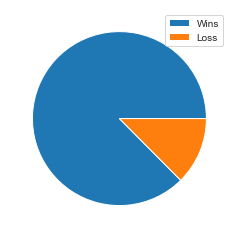

In [19]:
wins = df.loc[df["Win/Loss"]=="Win"].count()[0]
loss = df.loc[df["Win/Loss"]=="Loss"].count()[0]
plt.pie((wins, loss))
plt.legend(["Wins", "Loss"], loc='best')
plt.show()

In [43]:
win_rate = df.groupby(["Tier", "Win/Loss"]).count()["Turns"]
print(win_rate)

Tier                           Win/Loss
[Gen 7] NU                     Loss          2
                               Win          23
[Gen 7] PU                     Loss          6
                               Win          25
[Gen 7] RU                     Loss          5
                               Win          32
[Gen 7] Random Battle          Loss         10
                               Win          75
[Gen 7] UU                     Loss          3
                               Win          20
[Gen 7] Unrated Random Battle  Loss         28
                               Win         201
Name: Turns, dtype: int64


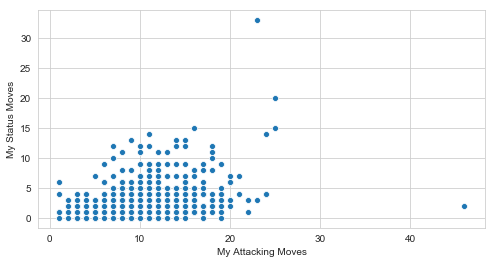

In [34]:
sns.scatterplot(df["My Attacking Moves"], df["My Status Moves"])

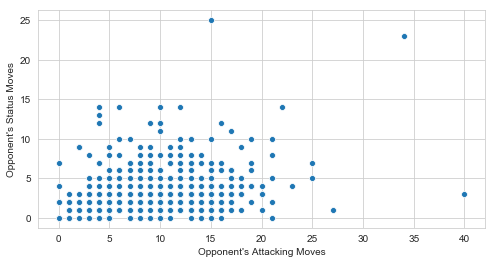

In [35]:
sns.scatterplot(df["Opponent's Attacking Moves"], df["Opponent's Status Moves"])

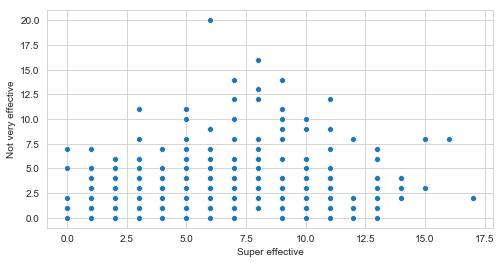

In [58]:
sns.scatterplot(df["Super effective"], df["Not very effective"])

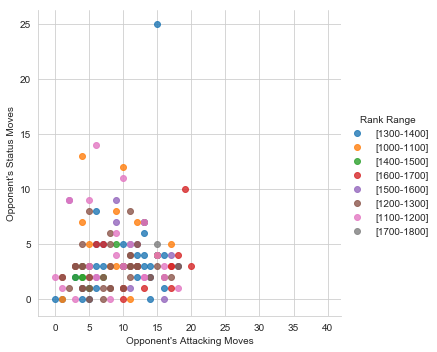

In [23]:
sns.lmplot("Opponent's Attacking Moves", "Opponent's Status Moves", df, hue="Rank Range", fit_reg=False)

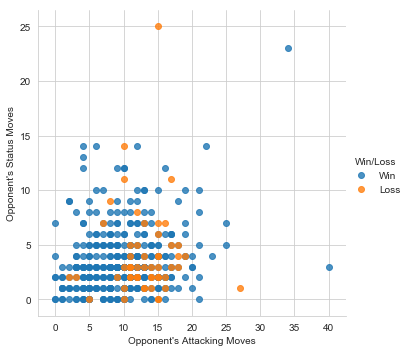

In [24]:
sns.lmplot("Opponent's Attacking Moves", "Opponent's Status Moves", df, hue="Win/Loss", fit_reg=False)

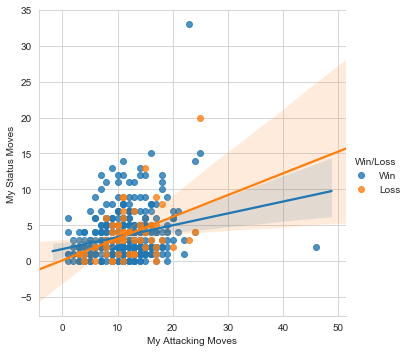

In [26]:
sns.lmplot("My Attacking Moves", "My Status Moves", df, hue="Win/Loss")

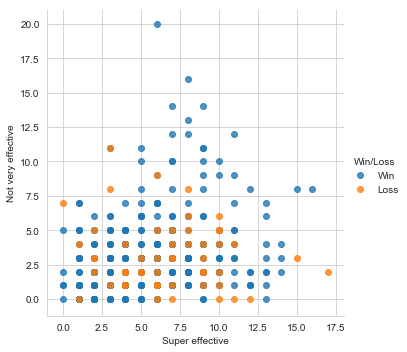

In [34]:
sns.lmplot("Super effective", "Not very effective", df, hue="Win/Loss", fit_reg=False)